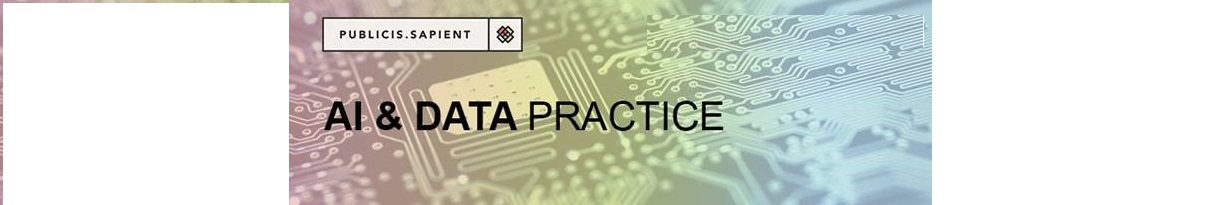

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os as os
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\logo.jpg")


## 2.0  Data Understanding
This phase is to collect and review Data

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import os as os
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set()
sns.set(style="whitegrid")

##### 2.0.1 Roles and Responsibilites-
- Project Lead - Provision Data Infrastructure

- Data Scientist - Provision Compute Resources (memory, servers, cloud instances)
                - Data Ingest and Exploration
                - Data Summary Report
- Solution Architect 
                 - Design Solution Architechture
                 - Solution Architechture Diagram

### 2.1 Collect Initial Data
- Initial Data Collection Report

##### 2. 1.1 DATA DICTIONARY
    - VARIABLE 1 NAME: VARIABLE EXPLANATION
    - VARIABLE 2 NAME: VARIABLE EXPLANATION
    - VARIABLE 3 NAME: VARIABLE EXPLANATION
    ....
    - VARIABLE N NAME: VARIABLE EXPLANATION


### 2.2 Is all data available

- Substituting with an alternative data source

- Narrowing the scope of the project

- Gathering new data

##### 2.2.1 DATA SOURCES
- Data sources used:
  - RDBMS NAME - NAME OF TABLES
  - NOSQL NAME - NAME OF DOCUMENTS
  - FILES
  
### 2.3 Data Input 
 Other types of data input available to pandas https://pandas.pydata.org/pandas-docs/stable/io.html
- Format Type	Data Description	Reader	Writer
- text	CSV                       read_csv	to_csv
 

In [3]:
#Put all data in data sub folder


df =pd.read_csv( 'PATH TO FILE', parameters)


for regression we take dataset from http://bit.ly/dsdata

In [4]:
path='C:\\Users\\ajaohri\\Desktop\\ODSP\\data'
os.chdir(path) 
os.listdir()

['adult.data.txt',
 'BigDiamonds.csv',
 'BigDiamonds.csv.zip',
 'BigDiamonds.zip',
 'daily-total-female-births.csv',
 'DecisionTree.png',
 'df3.csv',
 'diamonds.csv',
 'dot_data.txt',
 'fruit_classifier.txt',
 'plantTraits.csv',
 'R_ Plant Species Traits Data.html',
 'tree.dot',
 'xgb.pkl']

In [5]:
#finding all extension files in one folder
import glob
%pwd



#finding all extension files (here csv) in one folder

result = [i for i in glob.glob('*.{}'.format('csv'))]
print(result)

['BigDiamonds.csv', 'daily-total-female-births.csv', 'df3.csv', 'diamonds.csv', 'plantTraits.csv']


In [6]:

%%time
%time

df=pd.read_csv('C:\\Users\\ajaohri\\Desktop\\ODSP\\data\\BigDiamonds.csv')

Wall time: 0 ns
Wall time: 1.48 s


 In case we need to merge multiple datasets
- result = pd.merge(df1,df2[['variable1', 'variable2', 'variable3']],on='common_column_to_merge_on')

 we can use the parallel processing library DASK incase we need to merge a lot of files. Note use of wild cards (*) in filename 
- import dask.dataframe as dd
-  df = dd.read_csv('mortDefault*.csv')
-  df = df.compute()

-- This creates a pandas dataframe from Dask

### 2.4  Describe Data
#### 2.4.1 Data Description Report


In [7]:
print("The name of variables in the input dataset are ",df.columns)

The name of variables in the input dataset are  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'table', 'depth',
       'cert', 'measurements', 'price', 'x', 'y', 'z'],
      dtype='object')


In [8]:
print("The type of variables in the input dataset are ",df.dtypes)

The type of variables in the input dataset are  Unnamed: 0        int64
carat           float64
cut              object
color            object
clarity          object
table           float64
depth           float64
cert             object
measurements     object
price           float64
x               float64
y               float64
z               float64
dtype: object


In [9]:
#checking memory
print("The memory usage  of variables in the input dataset are ",df.memory_usage(deep=True))

The memory usage  of variables in the input dataset are  Index                 80
Unnamed: 0       4784192
carat            4784192
cut             37186704
color           37077488
clarity         35953755
table            4784192
depth            4784192
cert            36104079
measurements    45292814
price            4784192
x                4784192
y                4784192
z                4784192
dtype: int64


In [10]:
#size of object in GB
import sys

print("The memory usage  of dataset is GB",sys.getsizeof(df)/(1024**3))


The memory usage  of dataset is GB 0.21410033106803894


to save memory convert dtype vars to categorical df['dtypevariable'].astype('category').memory_usage(deep=True)

In [11]:
print("The first five rows of dataset are")
df.head()

The first five rows of dataset are


,Unnamed: 0,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
0,1,0.25,V.Good,K,I1,59.0,63.7,GIA,3.96 x 3.95 x 2.52,NaN,3.96,3.95,2.52
1,2,0.23,Good,G,I1,61.0,58.1,GIA,4.00 x 4.05 x 2.30,NaN,4.00,4.05,2.30
2,3,0.34,Good,J,I2,58.0,58.7,GIA,4.56 x 4.53 x 2.67,NaN,4.56,4.53,2.67
3,4,0.21,V.Good,D,I1,60.0,60.6,GIA,3.80 x 3.82 x 2.31,NaN,3.80,3.82,2.31
4,5,0.31,V.Good,K,I1,59.0,62.2,EGL,4.35 x 4.26 x 2.68,NaN,4.35,4.26,2.68


In [12]:
print("The last five rows of dataset are")
df.tail()

The last five rows of dataset are


,Unnamed: 0,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
598019,598020,3.02,Ideal,E,VVS2,58.0,59.8,HRD,9.43 x 9.51 x 5.66,99930.0,9.43,9.51,5.66
598020,598021,5.01,V.Good,I,VVS2,63.5,61.5,IGI,10.78 x 10.89 x 6.68,99942.0,10.78,10.89,6.68
598021,598022,3.43,Ideal,F,VS2,54.0,62.7,GIA,9.66 x 9.61 x 6.05,99960.0,9.66,9.61,6.05
598022,598023,3.01,V.Good,E,VS1,58.0,62.9,GIA,9.15 x 9.19 x 5.77,99966.0,9.15,9.19,5.77
598023,598024,4.13,Ideal,H,IF,56.0,62.5,IGI,10.27 x 10.19 x 6.4,99990.0,10.27,10.19,6.40


#### Random sample (useful for bigger datasets)


In [13]:
print("A 0.02% sample of dataset is")
df.head()
round(0.00002*len(df))

#taking a 0.02% sample
indices = np.random.permutation(round(0.00002*len(df)))
indices

df.iloc[indices,:]

A 0.02% sample of dataset is


,Unnamed: 0,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
1,2,0.23,Good,G,I1,61.0,58.1,GIA,4.00 x 4.05 x 2.30,NaN,4.00,4.05,2.30
11,12,0.20,V.Good,G,SI2,61.0,60.2,GIA,3.76 x 3.79 x 2.27,NaN,3.76,3.79,2.27
5,6,0.20,Good,G,SI2,60.0,64.4,GIA,3.74 x 3.67 x 2.38,NaN,3.74,3.67,2.38
8,9,0.23,V.Good,K,SI2,57.5,63.6,IGI,3.87 x 3.90 x 2.47,NaN,3.87,3.90,2.47
10,11,0.24,V.Good,F,I1,58.0,62.5,GIA,3.96 x 3.90 x 2.46,NaN,3.96,3.90,2.46
3,4,0.21,V.Good,D,I1,60.0,60.6,GIA,3.80 x 3.82 x 2.31,NaN,3.80,3.82,2.31
6,7,0.20,Good,G,SI2,63.0,62.6,GIA,3.72 x 3.65 x 2.31,NaN,3.72,3.65,2.31
9,10,0.20,Good,F,SI1,65.0,54.9,GIA,3.83 x 4.00 x 2.14,NaN,3.83,4.00,2.14
7,8,0.22,V.Good,D,I1,61.0,59.2,GIA,3.95 x 3.97 x 2.34,NaN,3.95,3.97,2.34
4,5,0.31,V.Good,K,I1,59.0,62.2,EGL,4.35 x 4.26 x 2.68,NaN,4.35,4.26,2.68


#### 2.4.2 Detailed Data Description Report
- Number of Variables
    Number of Categorical (Factor) Variables and Summary of Each (Value_Counts)
    Number of String Variables and Summary of Each 
    Number of Numeric Variables (Describe)
- Number of Rows

In [14]:
print('The input dataset df','has',df.shape[0],"rows and",df.shape[1],'columns')

The input dataset df has 598024 rows and 13 columns


In [15]:
#to check memory and workspace environment
%whos function DataFrame

Variable   Type         Data/Info
---------------------------------
df         DataFrame            Unnamed: 0  carat<...>598024 rows x 13 columns]


### 2.4.3 DELETING UNNECESSARY VARIABLES FOR MEMORY AND COMPUTATION

In [16]:
df = df.drop("Unnamed: 0", axis=1)

In [17]:
df = df.drop("measurements", axis=1)

### 2.4.4 CATEGORICAL  VARIABLES

In [18]:
#categorical columns
CATEGORICAL_COLUMNS=df.select_dtypes(exclude=['int', 'float','int64']).columns
CATEGORICAL_COLUMNS

Index(['cut', 'color', 'clarity', 'cert'], dtype='object')

In [19]:
categorical_data=df[CATEGORICAL_COLUMNS]

In [20]:
categorical_data.head()

,cut,color,clarity,cert
0,V.Good,K,I1,GIA
1,Good,G,I1,GIA
2,Good,J,I2,GIA
3,V.Good,D,I1,GIA
4,V.Good,K,I1,EGL


In [21]:
for i in range(len(CATEGORICAL_COLUMNS)):
    print("Unique Values of ",CATEGORICAL_COLUMNS[i],len(pd.value_counts(df[CATEGORICAL_COLUMNS[i]])))


Unique Values of  cut 3
Unique Values of  color 9
Unique Values of  clarity 9
Unique Values of  cert 9


Clearly if number of unique values is small it is categorical data, else it is numerical /string data and  needs to be deleted  from Categoric Data Columns

In [22]:
CATEGORICAL_COLUMNS= list(CATEGORICAL_COLUMNS)

##### YOU MAY NEED MANUAL INTERVENTION TO CLEAN UP WHAT IS NUMERICAL DATA OR WHAT IS CATEGORICAL DATA
CATEGORICAL_COLUMNS.remove('price')


In [23]:
CATEGORICAL_COLUMNS

['cut', 'color', 'clarity', 'cert']

In [24]:
for i in range(len(CATEGORICAL_COLUMNS)):
    print(" Value Counts of CATEGORICAL_COLUMN")
    print("Counts of",CATEGORICAL_COLUMNS[i])
    print(pd.value_counts(df[CATEGORICAL_COLUMNS[i]]))

 Value Counts of CATEGORICAL_COLUMN
Counts of cut
Ideal     369448
V.Good    168896
Good       59680
Name: cut, dtype: int64
 Value Counts of CATEGORICAL_COLUMN
Counts of color
G    96204
F    93573
E    93483
H    86619
D    73630
I    70282
J    48709
K    25868
L     9656
Name: color, dtype: int64
 Value Counts of CATEGORICAL_COLUMN
Counts of clarity
SI1     116631
VS2     111082
SI2     104300
VS1      97730
VVS2     65500
VVS1     54798
IF       31157
I1       14524
I2        2302
Name: clarity, dtype: int64
 Value Counts of CATEGORICAL_COLUMN
Counts of cert
GIA           463555
IGI            43667
EGL            33814
EGL USA        16079
EGL Intl.      11447
EGL ISRAEL     11301
HRD             9936
OTHER           5267
AGS             2958
Name: cert, dtype: int64


In [25]:
df.color.value_counts()

G    96204
F    93573
E    93483
H    86619
D    73630
I    70282
J    48709
K    25868
L     9656
Name: color, dtype: int64

In [26]:
pd.crosstab(df.color,df.clarity)

clarity,I1,I2,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,,
D,991,268,6020,12780,10569,11964,13123,7683,10232
E,2190,310,4832,16776,15017,15617,17237,9781,11723
F,2471,394,4699,18264,15844,17046,16981,8589,9285
G,2491,467,4871,20095,17753,13699,17814,9458,9556
H,2213,291,3746,18229,17701,14483,15597,6538,7821
I,1875,252,2718,14447,13586,10824,13767,5503,7310
J,1263,171,2248,9600,8956,8045,9172,4006,5248
K,707,96,1490,4703,3576,4376,5391,2368,3161
L,323,53,533,1737,1298,1676,2000,872,1164


cert     AGS    EGL  EGL ISRAEL  EGL Intl.  EGL USA     GIA   HRD    IGI  \
cut                                                                        
Good     174   5953         577        540     1546   44716  1288   4537   
Ideal   2466  16514        6791       7375     9020  295967  5089  22901   
V.Good   318  11347        3933       3532     5513  122872  3559  16229   

cert    OTHER  
cut            
Good      349  
Ideal    3325  
V.Good   1593  


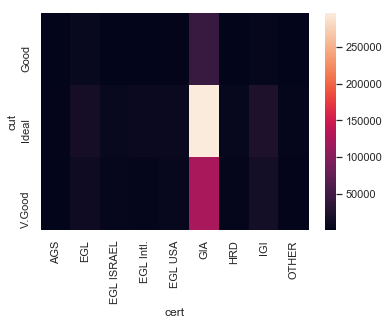

In [27]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[3]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[3]]))

cert   AGS   EGL  EGL ISRAEL  EGL Intl.  EGL USA    GIA   HRD   IGI  OTHER
color                                                                     
D      180  4170        1691       1788     1303  60307   331  3106    754
E      205  3848        1276       1397     1624  79843   607  4044    639
F      291  5120        1891       2002     1923  76741   769  3928    908
G      468  6888        2354       2553     3154  73599  1191  5014    983
H      627  7222        2945       2695     3748  58096  1658  8765    863
I      786  3701         935        831     2357  50884  1560  8603    625
J      273  1666         165        151     1177  38242  1260  5517    258
K      106   868          39         24      637  19195  1623  3229    147
L       22   331           5          6      156   6648   937  1461     90


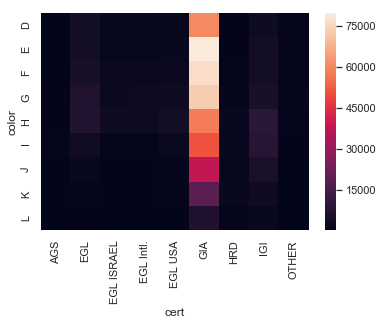

In [28]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[1]],df[CATEGORICAL_COLUMNS[3]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[1]],df[CATEGORICAL_COLUMNS[3]]))

cert      AGS   EGL  EGL ISRAEL  EGL Intl.  EGL USA    GIA   HRD    IGI  OTHER
clarity                                                                       
I1         29  2083          37         52      804   8875   116   2187    341
I2          0  1286           2          0      121    636     0     89    168
IF         48    82           3          8       68  26918  1182   2787     61
SI1       736  9198        3749       3897     3817  86750   994   6126   1364
SI2      1052  8645        2822       2586     4968  65985  2251  15135    856
VS1       392  4588        1627       1704     2553  80052  1363   4643    808
VS2       560  6623        2554       2700     3153  87613  1297   5267   1315
VVS1       52   280          78         83      178  49420  1201   3378    128
VVS2       89  1029         429        417      417  57306  1532   4055    226


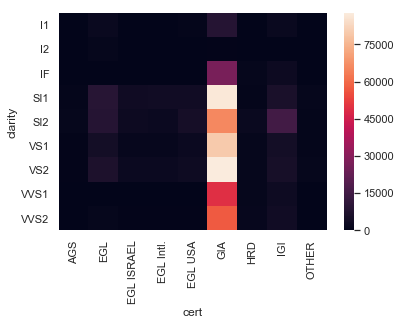

In [29]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[2]],df[CATEGORICAL_COLUMNS[3]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[2]],df[CATEGORICAL_COLUMNS[3]]))

clarity    I1   I2     IF    SI1    SI2    VS1    VS2   VVS1   VVS2
cut                                                                
Good     3406  886   1069  11946  12068   9691  11309   3521   5784
Ideal    5054  418  24843  70789  57699  61645  68500  38418  42082
V.Good   6064  998   5245  33896  34533  26394  31273  12859  17634


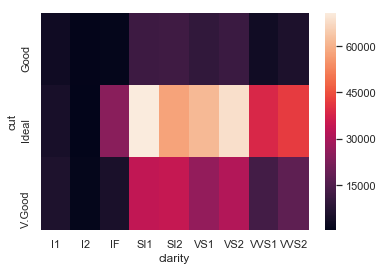

In [30]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[2]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[2]]))

clarity    I1   I2    IF    SI1    SI2    VS1    VS2  VVS1   VVS2
color                                                            
D         991  268  6020  12780  10569  11964  13123  7683  10232
E        2190  310  4832  16776  15017  15617  17237  9781  11723
F        2471  394  4699  18264  15844  17046  16981  8589   9285
G        2491  467  4871  20095  17753  13699  17814  9458   9556
H        2213  291  3746  18229  17701  14483  15597  6538   7821
I        1875  252  2718  14447  13586  10824  13767  5503   7310
J        1263  171  2248   9600   8956   8045   9172  4006   5248
K         707   96  1490   4703   3576   4376   5391  2368   3161
L         323   53   533   1737   1298   1676   2000   872   1164


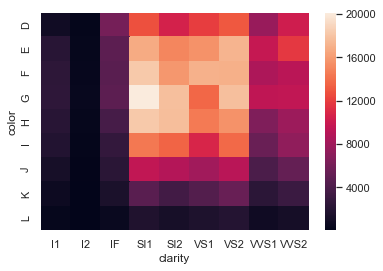

In [31]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[1]],df[CATEGORICAL_COLUMNS[2]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[1]],df[CATEGORICAL_COLUMNS[2]]))

color       D      E      F      G      H      I      J      K     L
cut                                                                 
Good     6604   9733   9141   8923   7600   7380   5357   3467  1475
Ideal   45435  55547  58148  62067  56026  43000  29440  14729  5056
V.Good  21591  28203  26284  25214  22993  19902  13912   7672  3125


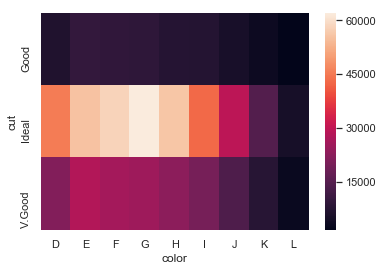

In [32]:
sns.heatmap(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[1]]))
print(pd.crosstab(df[CATEGORICAL_COLUMNS[0]],df[CATEGORICAL_COLUMNS[1]]))

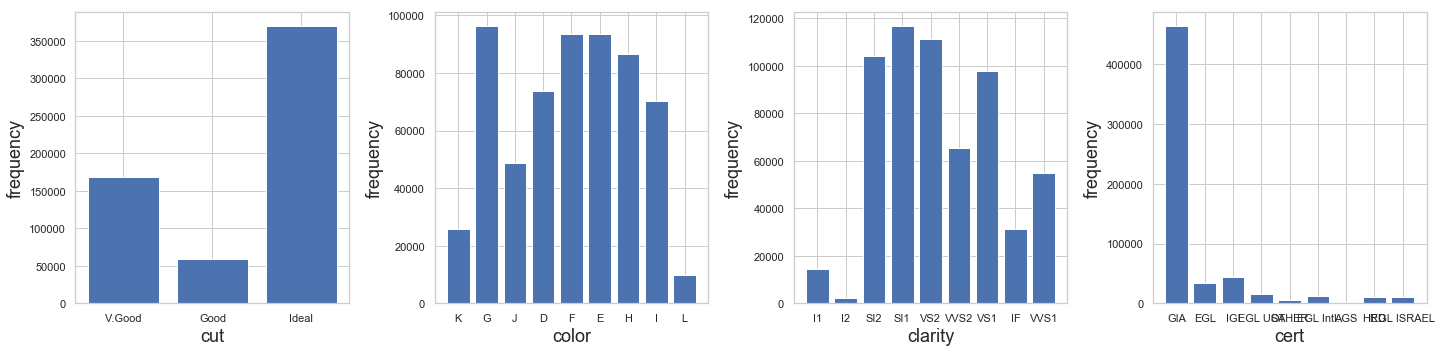

In [33]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    return(plt.show())

plot_categoricals(categorical_data)

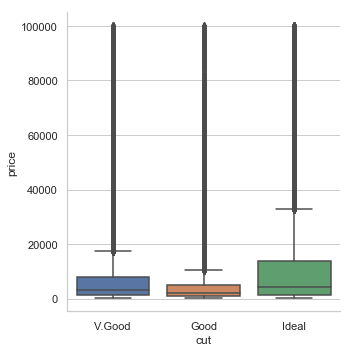

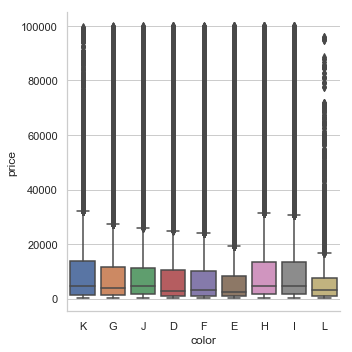

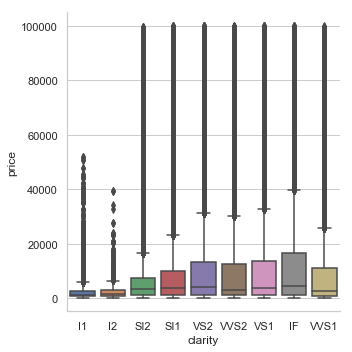

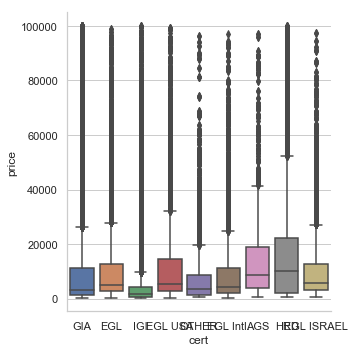

In [34]:
# display categorical data

for x in CATEGORICAL_COLUMNS:
#        sns.countplot(x,data=df)
        sns.catplot(x, y="price", kind="box", data=df);


In [35]:
!pip install ggplot

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
#### FOR TIMSETAMP ERROR IN GGPLOT IMPORT
# Edit C:\ProgramData\Anaconda3\Lib\site-packages\ggplot\stats\smoothers.py and change
# from pandas.lib import Timestamp
# to
# from pandas import Timestamp 

In [37]:
from ggplot import *


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


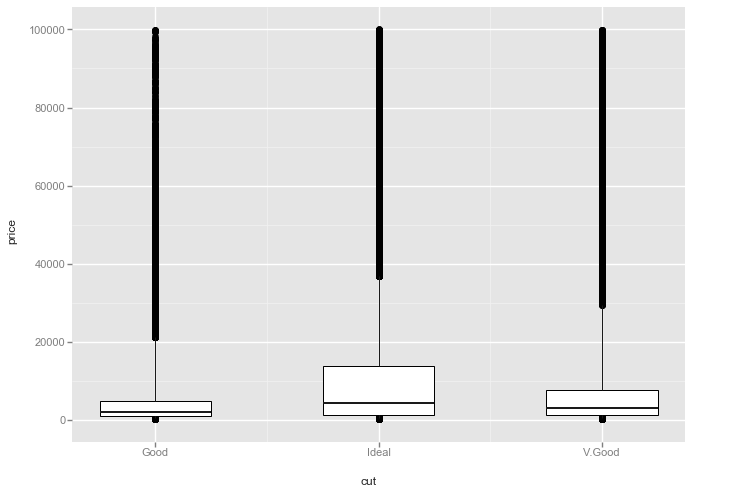

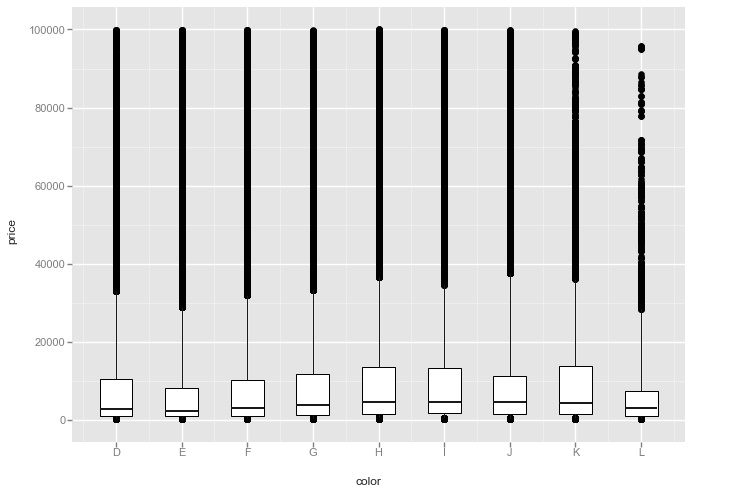

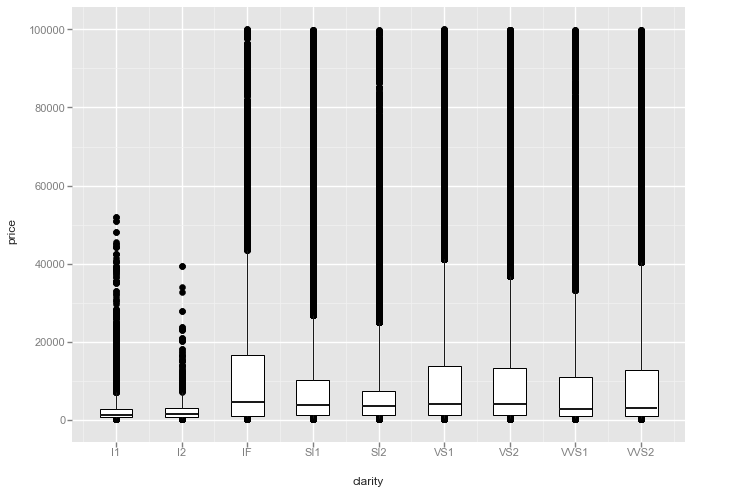

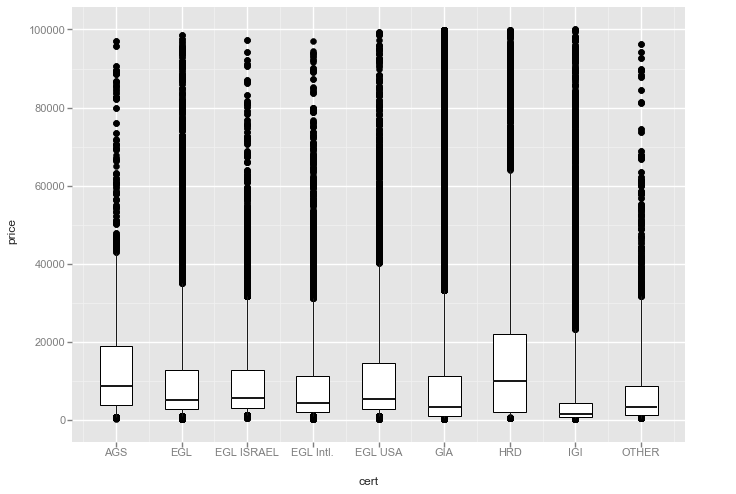

In [38]:
# display categorical data

for x in CATEGORICAL_COLUMNS:
#        sns.countplot(x,data=df)
        g=ggplot(df, aes(x, y='price')) + geom_boxplot()
        g.show()


### 2.4.5  CONTINOUS VARIABLES  

In [39]:
CONTINUOUS_COLUMNS = df._get_numeric_data().columns
CONTINUOUS_COLUMNS

Index(['carat', 'table', 'depth', 'price', 'x', 'y', 'z'], dtype='object')

In [40]:
continuous_data=df[CONTINUOUS_COLUMNS]

#### SUMMARY of VARIABLES

In [41]:
print('After deleting "Unnamed: 0" and "measurements" the data has',len(CATEGORICAL_COLUMNS),'Categorical Columns and ',len(CONTINUOUS_COLUMNS),'Continuous Columns')

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.After deleting "Unnamed: 0" and "measurements" the data has
 4 Categorical Columns and  7 Continuous Columns


In [42]:
continuous_data.head()

,carat,table,depth,price,x,y,z
0,0.25,59.0,63.7,NaN,3.96,3.95,2.52
1,0.23,61.0,58.1,NaN,4.00,4.05,2.30
2,0.34,58.0,58.7,NaN,4.56,4.53,2.67
3,0.21,60.0,60.6,NaN,3.80,3.82,2.31
4,0.31,59.0,62.2,NaN,4.35,4.26,2.68


In [43]:
for i in range(len(CONTINUOUS_COLUMNS)):
    print(" ")
    print(" Numerical Summary of Continuous Columns",CONTINUOUS_COLUMNS[i],(df[CONTINUOUS_COLUMNS[i]].describe()))

 
 Numerical Summary of Continuous Columns carat count    598024.000000
mean          1.071297
std           0.812696
min           0.200000
25%           0.500000
50%           0.900000
75%           1.500000
max           9.250000
Name: carat, dtype: float64
 
 Numerical Summary of Continuous Columns table count    598024.000000
mean         57.631077
std           4.996892
min           0.000000
25%          56.000000
50%          58.000000
75%          59.000000
max          75.900000
Name: table, dtype: float64
 
 Numerical Summary of Continuous Columns depth count    598024.000000
mean         61.063683
std           7.604342
min           0.000000
25%          61.000000
50%          62.100000
75%          62.700000
max          81.300000
Name: depth, dtype: float64
 
 Numerical Summary of Continuous Columns price count    597311.000000
mean       8753.017974
std       13017.567760
min         300.000000
25%        1220.000000
50%        3503.000000
75%       11174.000000
max    

In [44]:
CONTINUOUS_COLUMNS

Index(['carat', 'table', 'depth', 'price', 'x', 'y', 'z'], dtype='object')

In [45]:
continuous_data.describe()

,carat,table,depth,price,x,y,z
count,598024.000000,598024.000000,598024.000000,597311.000000,596209.000000,596172.000000,595480.000000
mean,1.071297,57.631077,61.063683,8753.017974,5.990771,6.198671,4.033430
std,0.812696,4.996892,7.604342,13017.567760,1.530936,1.485891,1.240951
min,0.200000,0.000000,0.000000,300.000000,0.150000,1.000000,0.040000
25%,0.500000,56.000000,61.000000,1220.000000,4.740000,4.970000,3.120000
50%,0.900000,58.000000,62.100000,3503.000000,5.780000,6.050000,3.860000
75%,1.500000,59.000000,62.700000,11174.000000,6.970000,7.230000,4.610000
max,9.250000,75.900000,81.300000,99990.000000,13.890000,13.890000,13.180000


In [46]:
for i in range(len(CONTINUOUS_COLUMNS)):
    print("Unique Values of ",CONTINUOUS_COLUMNS[i],len(pd.value_counts(df[CONTINUOUS_COLUMNS[i]])))


Unique Values of  carat 628
Unique Values of  table 187
Unique Values of  depth 285
Unique Values of  price 40312
Unique Values of  x 1030
Unique Values of  y 911
Unique Values of  z 961


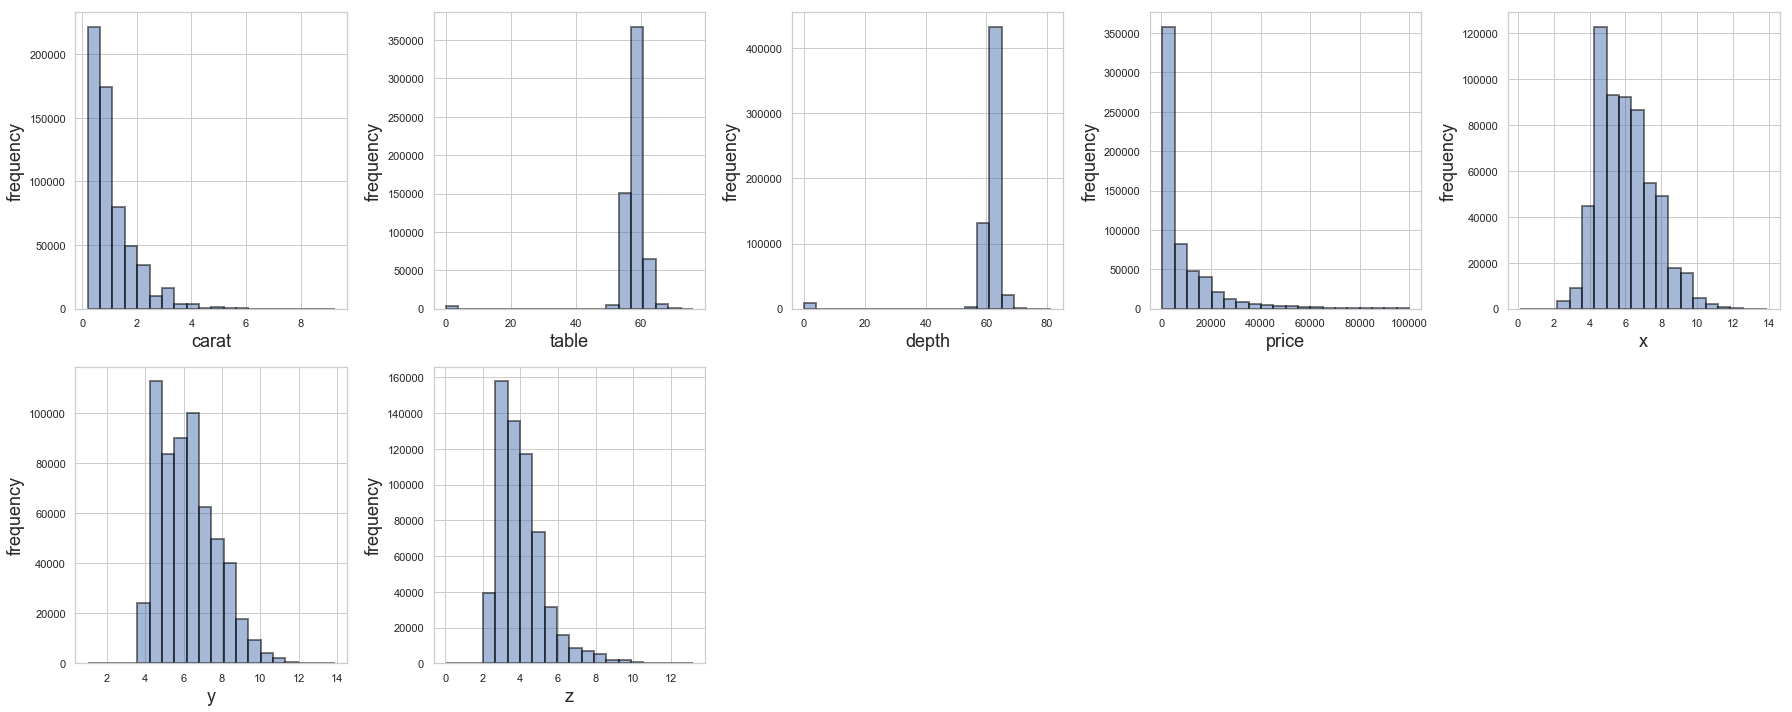

In [47]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    return(plt.show())

plot_histgrams(continuous_data)

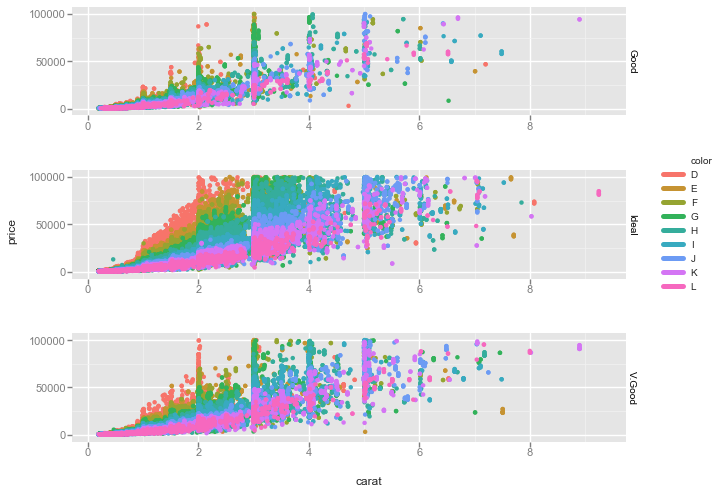

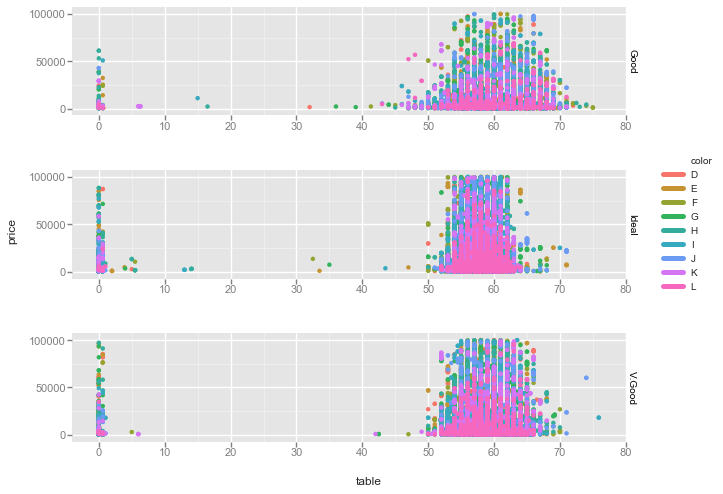

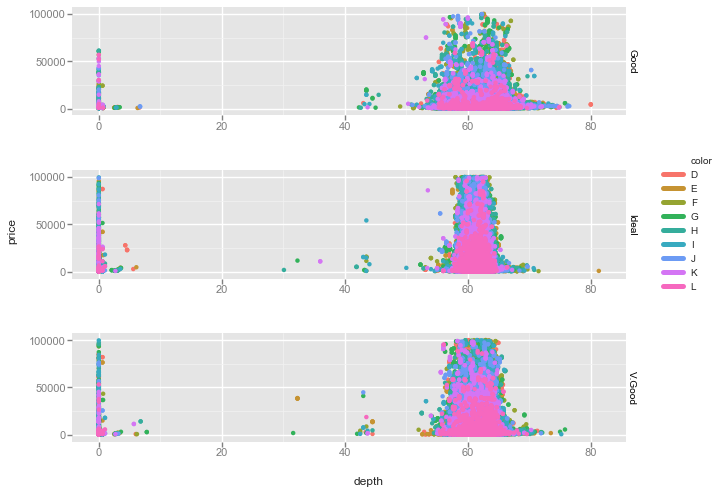

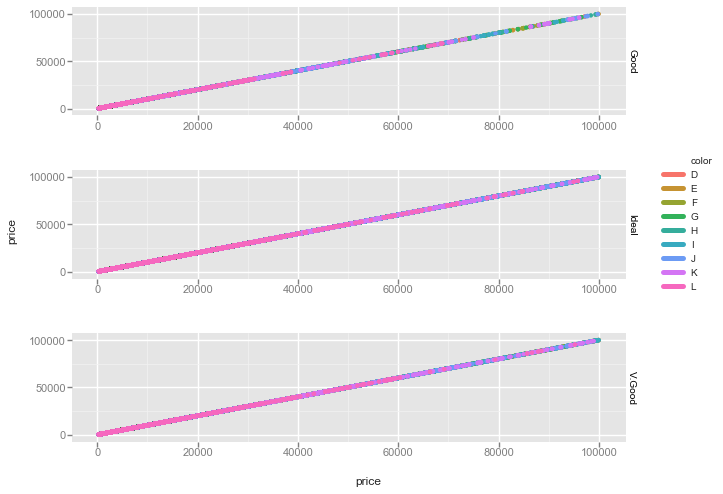

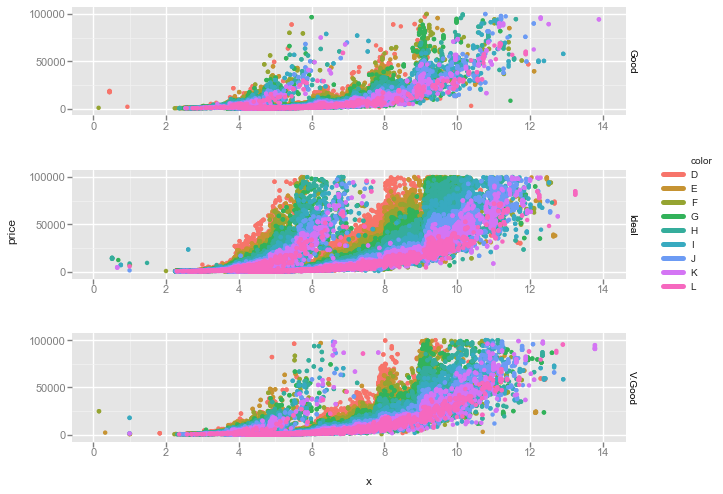

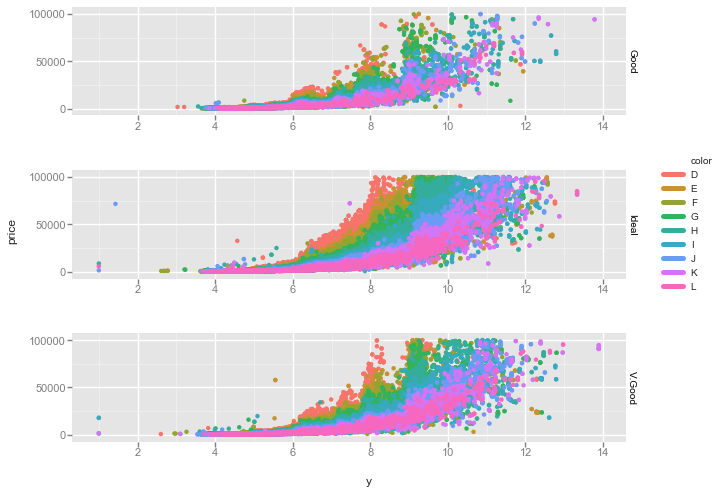

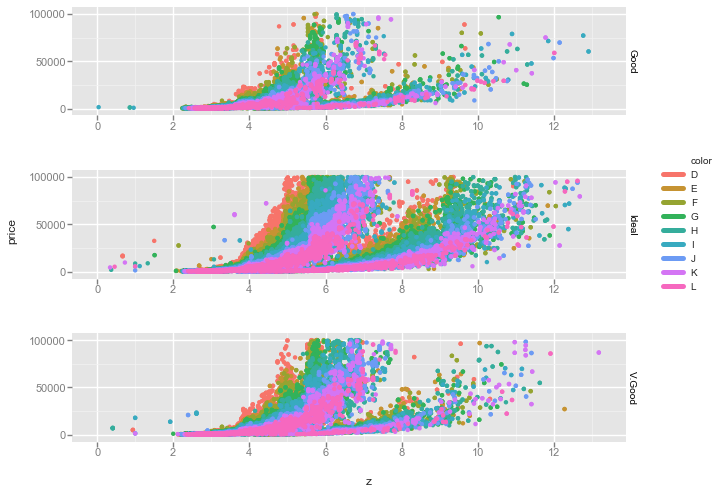

In [48]:
# display numeric data

for x in CONTINUOUS_COLUMNS:
#        sns.countplot(x,data=df)
        g=ggplot(df, aes(x, y='price',color='color')) + geom_point() + facet_grid("cut")
        g.show()

In [49]:
df.corr()

,carat,table,depth,price,x,y,z
carat,1.000000,0.036533,0.009846,0.856328,0.860246,0.960807,0.792051
table,0.036533,1.000000,0.448772,0.023378,0.027504,0.044542,0.030344
depth,0.009846,0.448772,1.000000,-0.001006,-0.003279,0.007669,0.031801
price,0.856328,0.023378,-0.001006,1.000000,0.719778,0.796765,0.645317
x,0.860246,0.027504,-0.003279,0.719778,1.000000,0.894203,0.483102
y,0.960807,0.044542,0.007669,0.796765,0.894203,1.000000,0.820211
z,0.792051,0.030344,0.031801,0.645317,0.483102,0.820211,1.000000


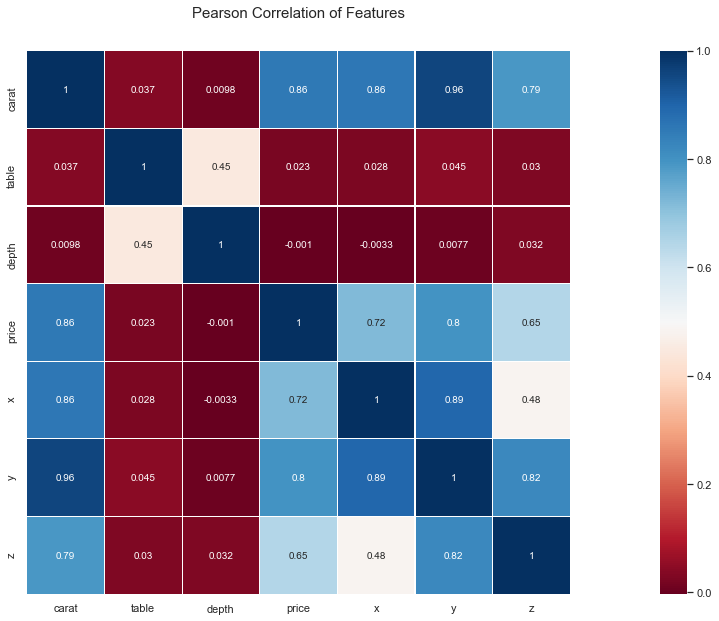

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

## 2.5 Data Description and Exploration Report
Data Exploration Report


The input dataset df has 598024 rows and 11 columns
The name of variables in the input dataset are  ['carat', 'cut', 'color', 'clarity', 'table', 'depth', 'cert', 'price', 'x', 'y', 'z']
After deleting "Unnamed: 0" and "measurements" variables from the data, the remaining data has 4 Categorical Columns and  7 Continuous Columns
The Categorical variables in the input dataset are  ['cut', 'color', 'clarity', 'cert']
The Continuous variables in the input dataset are  ['carat', 'table', 'depth', 'price', 'x', 'y', 'z']
The Categorical variables in the input dataset can be shown as


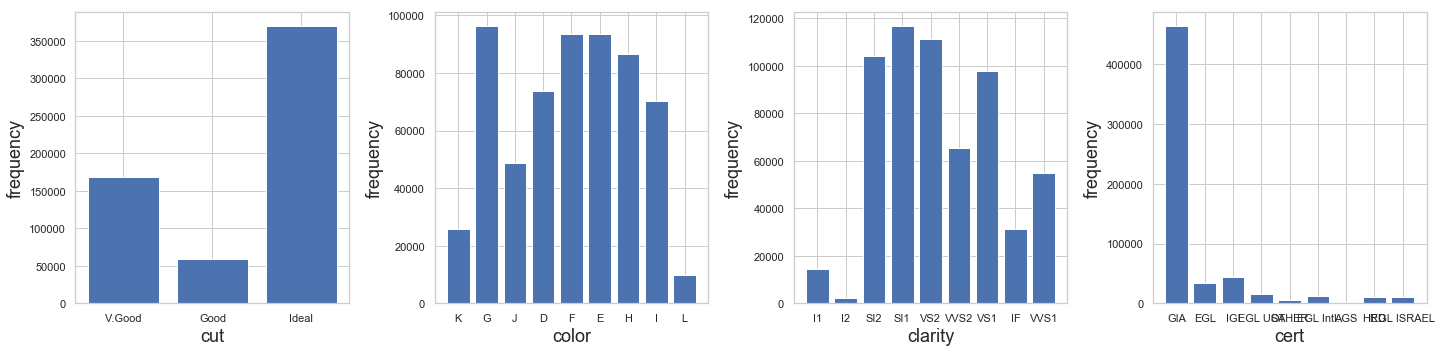

The Continuous variables in the input dataset can be shown as


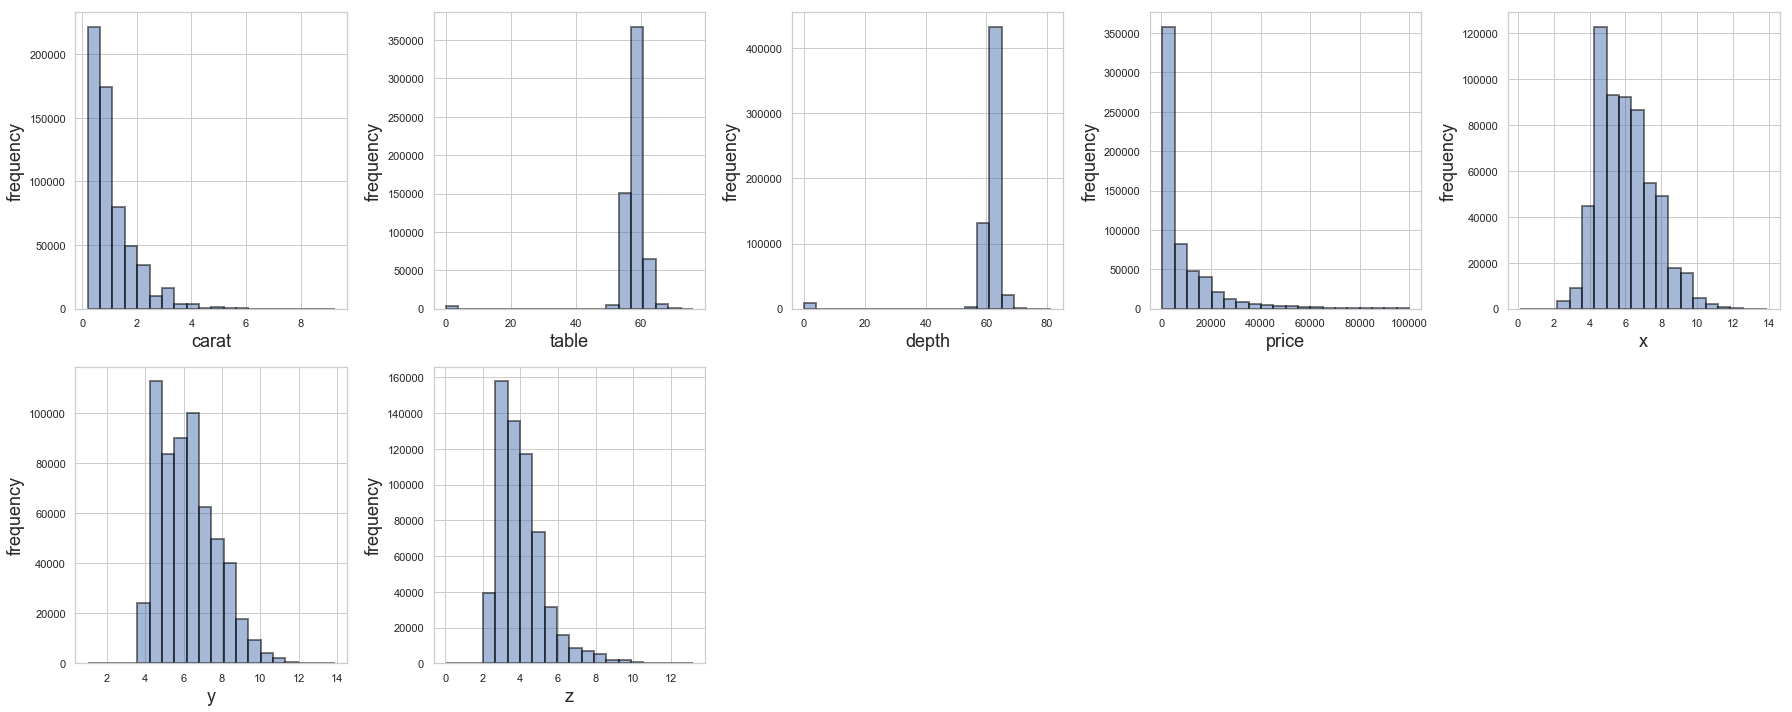

In [51]:
print('The input dataset df','has',df.shape[0],"rows and",df.shape[1],'columns')
print("The name of variables in the input dataset are ",list(df.columns))
print('After deleting "Unnamed: 0" and "measurements" variables from the data, the remaining data has',len(CATEGORICAL_COLUMNS),'Categorical Columns and ',len(CONTINUOUS_COLUMNS),'Continuous Columns')
print("The Categorical variables in the input dataset are ",list(categorical_data.columns))
print("The Continuous variables in the input dataset are ",list(continuous_data.columns))
print("The Categorical variables in the input dataset can be shown as");plot_categoricals(categorical_data)
print("The Continuous variables in the input dataset can be shown as");plot_histgrams(continuous_data)


In [52]:
df.describe()

,carat,table,depth,price,x,y,z
count,598024.000000,598024.000000,598024.000000,597311.000000,596209.000000,596172.000000,595480.000000
mean,1.071297,57.631077,61.063683,8753.017974,5.990771,6.198671,4.033430
std,0.812696,4.996892,7.604342,13017.567760,1.530936,1.485891,1.240951
min,0.200000,0.000000,0.000000,300.000000,0.150000,1.000000,0.040000
25%,0.500000,56.000000,61.000000,1220.000000,4.740000,4.970000,3.120000
50%,0.900000,58.000000,62.100000,3503.000000,5.780000,6.050000,3.860000
75%,1.500000,59.000000,62.700000,11174.000000,6.970000,7.230000,4.610000
max,9.250000,75.900000,81.300000,99990.000000,13.890000,13.890000,13.180000
